In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset=pd.read_csv('insurance_pre.csv')

In [26]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [27]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [28]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [29]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [30]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [31]:
dependent=dataset[['charges']]

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid={"criterion":["squared_error", 'friedman_mse', 'absolute_error', 'poisson'] ,'splitter':['best', 'random'],'max_features':['auto','sqrt', 'log2']}
grid= GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)

In [34]:
grid.fit(independent,dependent)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ELCOT\anaconda3\Lib\site-packages

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [36]:
re=grid.cv_results_
print("The R_score value for best parameter ():".format(grid.best_params_),r_score)

NameError: name 'r_score' is not defined

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion= 'poisson',  splitter= 'random',max_depth= 10000000)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10000000,
                      splitter='random')

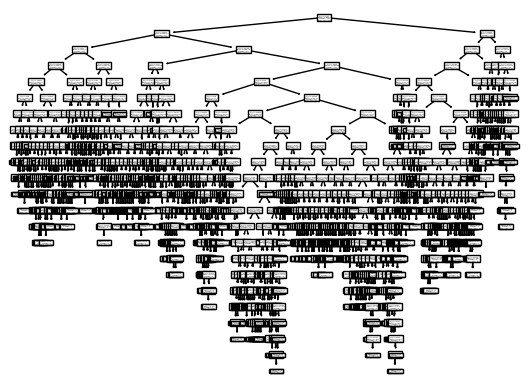

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [107]:
y_pred=regressor.predict(X_test)

In [108]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)

In [109]:
r_score

0.7306003705708137